In [1]:
# from imblearn.under_sampling import TomeLinks

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df=pd.read_csv("data/train.csv")
df.sample(6)

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
58697,58697,40,165,55,81.0,1.0,1.0,1,1,106,...,60,78,13.2,1,0.9,17,9,18,0,1
155899,155899,40,165,75,87.0,0.9,0.1,1,1,118,...,45,148,13.1,1,0.9,50,76,39,0,0
99279,99279,50,170,70,88.5,0.8,1.0,1,1,115,...,59,107,15.8,1,1.3,25,28,72,0,0
110087,110087,45,180,75,83.2,1.0,1.0,1,1,144,...,57,114,17.1,1,0.9,36,57,56,1,1
22530,22530,60,170,75,93.0,1.0,0.8,1,1,136,...,36,92,14.0,1,1.5,17,18,25,0,0
134027,134027,40,155,50,65.0,1.2,1.5,1,1,110,...,67,84,10.6,1,0.8,27,16,11,0,0


In [4]:
duplicates=df[df.duplicated()]

In [5]:
len(duplicates)

0

In [6]:
df.columns

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [7]:
# df.corr()["smoking"]

In [8]:
df.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [9]:
df.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [10]:
df["eyesight"]=df["eyesight(left)"]+df["eyesight(right)"]

In [11]:
# df.corr()["smoking"]

In [12]:
df["bmi"]=df["height(cm)"]*0.01/df["weight(kg)"]

In [13]:
# df.corr()["smoking"]

In [14]:
# df.drop(["heightWaist","hearing"],axis=1,inplace=True)
df.corr()["smoking"]

id                    -0.000632
age                   -0.206033
height(cm)             0.447111
weight(kg)             0.351748
waist(cm)              0.262715
eyesight(left)         0.100420
eyesight(right)        0.109781
hearing(left)         -0.038219
hearing(right)        -0.036858
systolic               0.058642
relaxation             0.109501
fasting blood sugar    0.096534
Cholesterol           -0.051896
triglyceride           0.331975
HDL                   -0.271186
LDL                   -0.072285
hemoglobin             0.450679
Urine protein         -0.028548
serum creatinine       0.272979
AST                    0.059394
ALT                    0.163016
Gtp                    0.305561
dental caries          0.106636
smoking                1.000000
eyesight               0.123408
bmi                   -0.286885
Name: smoking, dtype: float64

In [15]:
def get_unique(col):
    print(col)
    print(df[col].unique())
    print()
for i in df.columns:
    get_unique(i)

id
[     0      1      2 ... 159253 159254 159255]

age
[55 70 20 35 30 50 45 40 60 25 65 75 80 85 62 69 49 58]

height(cm)
[165 170 180 160 155 175 150 181 145 185 140 190 135 139]

weight(kg)
[ 60  65  75  95  55  70  50  45  90  80  85 110  40 100 130 105  30 120
 115 125  35 101  89  82  83  99  79  88]

waist(cm)
[ 81.   89.  105.   80.5  51.   69.   84.5  73.   68.   64.   80.  103.
  81.8  78.   92.   71.5  90.   93.   85.   86.4  84.   66.   75.   87.5
  91.5  76.   87.   71.   86.   83.   87.2  94.   91.   70.   88.   72.
  93.1  70.4  79.   77.   82.   87.8  97.   85.5  67.   87.3 114.   95.2
  67.2  99.   65.   90.5  74.   73.5  95.   75.8  77.2  98.   91.1  62.
  90.2 101.   89.6  83.4  68.5  72.5  85.7  87.1  59.   89.5 108.5  90.1
  91.8  86.2  72.8  73.2  89.8  86.3 100.   81.5  97.5  76.2  94.5  79.4
  98.5  78.4  90.8  88.4  98.4  94.2  79.7  83.5  93.6  89.9  93.2  89.2
  71.2  92.8  88.2  65.6 101.8  97.8  72.4  75.6  69.8  84.2  60.   92.3
  83.8  75.4  77.6  95.5  

In [16]:
def lowCols(col):
    if len(df[col].unique())<3:
        print(col)
for i in df.columns:
    lowCols(i)

hearing(left)
hearing(right)
dental caries
smoking


<AxesSubplot:xlabel='bmi', ylabel='Count'>

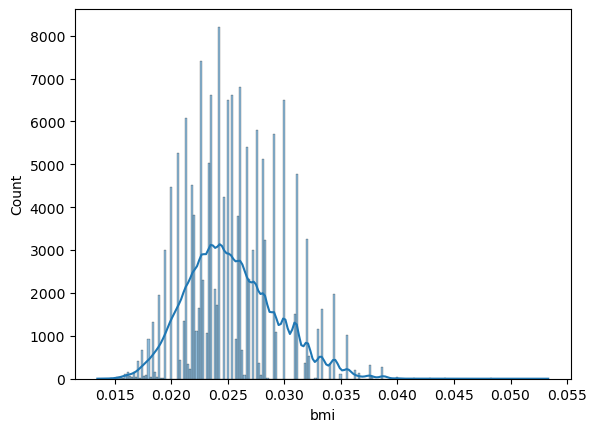

In [17]:
sns.histplot(df,x=df["bmi"],kde=True)

<AxesSubplot:xlabel='bmi'>

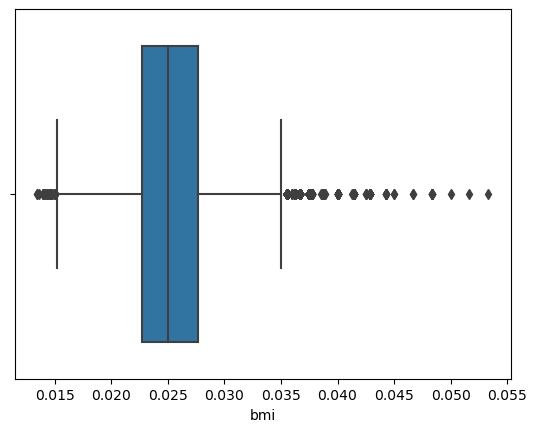

In [18]:
sns.boxplot(data=df,x="bmi")

In [ ]:
def plotSkew(i,col):
    plt.subplot(len(df.columns),2,2*i+1)
    sns.histplot(data=df,x=col,kde=True)
    plt.subplot(len(df.columns),2,2*i+2)
    plt.boxplot(data=df,x=col,vert=False)
plt.figure(figsize=(40,40))
for i,col in enumerate(df.columns):
    plotSkew(i,col)
plt.tight_layout()
plt.show()

In [ ]:
for i,col in enumerate(df.columns):
    plotSkew(i,col)

In [20]:
poly=PolynomialFeatures().fit(df.drop("smoking",axis=1))
poly_df=pd.DataFrame(poly.transform(df.drop("smoking",axis=1)),columns=poly.get_feature_names_out())
poly_df=poly_df.drop("1",axis=1)
poly_df.sample(6)

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,Gtp^2,Gtp dental caries,Gtp eyesight,Gtp bmi,dental caries^2,dental caries eyesight,dental caries bmi,eyesight^2,eyesight bmi,bmi^2
136836,136836.0,40.0,155.0,45.0,69.0,0.8,0.7,1.0,1.0,102.0,...,361.0,0.0,28.5,0.654444,0.0,0.0,0.0,2.25,0.051667,0.001186
107786,107786.0,35.0,180.0,65.0,75.0,1.2,1.5,1.0,1.0,127.0,...,196.0,0.0,37.8,0.387692,0.0,0.0,0.0,7.29,0.074769,0.000767
117207,117207.0,45.0,165.0,60.0,83.1,0.8,0.8,1.0,1.0,111.0,...,289.0,0.0,27.2,0.467500,0.0,0.0,0.0,2.56,0.044000,0.000756
140953,140953.0,60.0,155.0,55.0,85.0,0.4,1.0,1.0,2.0,128.0,...,441.0,0.0,29.4,0.591818,0.0,0.0,0.0,1.96,0.039455,0.000794
9758,9758.0,55.0,155.0,65.0,84.0,0.9,1.5,1.0,1.0,116.0,...,100.0,0.0,24.0,0.238462,0.0,0.0,0.0,5.76,0.057231,0.000569
86503,86503.0,40.0,175.0,80.0,90.8,0.8,0.7,1.0,1.0,108.0,...,625.0,0.0,37.5,0.546875,0.0,0.0,0.0,2.25,0.032812,0.000479


In [21]:
df.columns

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking', 'eyesight', 'bmi'],
      dtype='object')

In [23]:
smoking=df["smoking"]
poly_merged_df=pd.merge(df,poly_df,on="id",how="inner")

In [24]:
poly_merged_df.columns

Index(['id', 'age_x', 'height(cm)_x', 'weight(kg)_x', 'waist(cm)_x',
       'eyesight(left)_x', 'eyesight(right)_x', 'hearing(left)_x',
       'hearing(right)_x', 'systolic_x',
       ...
       'Gtp^2', 'Gtp dental caries', 'Gtp eyesight', 'Gtp bmi',
       'dental caries^2', 'dental caries eyesight', 'dental caries bmi',
       'eyesight^2', 'eyesight bmi', 'bmi^2'],
      dtype='object', length=375)

In [25]:
relatedValues=poly_merged_df.corr()["smoking"]

In [26]:
up_cols = relatedValues[relatedValues.values > 0.2].index.tolist()
down_cols=relatedValues[(relatedValues.values <-0.2)].index.tolist()
important_columns=up_cols+down_cols
final_poly_df=poly_merged_df[important_columns]

In [29]:
final_poly_df=poly_merged_df[important_columns]

In [30]:
final_poly_df.corr()["smoking"]

height(cm)_x      0.447111
weight(kg)_x      0.351748
waist(cm)_x       0.262715
triglyceride_x    0.331975
hemoglobin_x      0.450679
                    ...   
HDL^2            -0.261970
HDL LDL          -0.254801
HDL bmi          -0.318609
LDL bmi          -0.224091
bmi^2            -0.285733
Name: smoking, Length: 127, dtype: float64

In [31]:
final_poly_df.sample(6)

,height(cm)_x,weight(kg)_x,waist(cm)_x,triglyceride_x,hemoglobin_x,serum creatinine_x,Gtp_x,smoking,height(cm)_y,weight(kg)_y,...,systolic HDL,systolic bmi,relaxation HDL,Cholesterol HDL,Cholesterol bmi,HDL^2,HDL LDL,HDL bmi,LDL bmi,bmi^2
77996,170,70,83.0,206,15.5,1.0,19,0,170.0,70.0,...,6072.0,3.205714,3496.0,11638.0,6.144286,2116.0,7590.0,1.117143,4.007143,0.000590
97887,150,50,70.0,49,13.4,0.7,14,0,150.0,50.0,...,8880.0,3.600000,5698.0,15688.0,6.360000,5476.0,9472.0,2.220000,3.840000,0.000900
148535,155,50,76.0,69,12.1,1.1,12,0,155.0,50.0,...,9350.0,3.410000,5950.0,16065.0,5.859000,7225.0,7650.0,2.635000,2.790000,0.000961
56103,160,55,73.8,83,14.0,0.7,13,0,160.0,55.0,...,8510.0,3.345455,4958.0,18870.0,7.418182,5476.0,12210.0,2.152727,4.800000,0.000846
19082,170,75,82.2,133,15.2,1.2,35,0,170.0,75.0,...,5676.0,2.992000,4300.0,7181.0,3.785333,1849.0,4171.0,0.974667,2.198667,0.000514
108668,170,70,91.0,215,11.5,0.6,33,1,170.0,70.0,...,4726.0,3.375714,2992.0,6460.0,4.614286,1156.0,3944.0,0.825714,2.817143,0.000590


In [32]:
from sklearn.model_selection import train_test_split

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train=pd.DataFrame(scaler.fit_transform(final_poly_df),columns=final_poly_df.columns)

In [38]:
train.sample(6)

,height(cm)_x,weight(kg)_x,waist(cm)_x,triglyceride_x,hemoglobin_x,serum creatinine_x,Gtp_x,smoking,height(cm)_y,weight(kg)_y,...,systolic HDL,systolic bmi,relaxation HDL,Cholesterol HDL,Cholesterol bmi,HDL^2,HDL LDL,HDL bmi,LDL bmi,bmi^2
115719,0.636364,0.35,0.355263,0.093668,0.683230,0.102041,0.022066,1.0,0.636364,0.35,...,0.368165,0.284481,0.411968,0.320517,0.274853,0.246701,0.051295,0.292328,0.044864,0.188797
82735,0.545455,0.40,0.500000,0.183377,0.757764,0.122449,0.079238,1.0,0.545455,0.40,...,0.170543,0.172033,0.164303,0.249160,0.380539,0.082487,0.054152,0.125984,0.072760,0.140581
72671,0.454545,0.25,0.368421,0.221636,0.627329,0.061224,0.009027,0.0,0.454545,0.25,...,0.331783,0.358953,0.364753,0.437017,0.555027,0.197665,0.078203,0.291549,0.084949,0.249722
138084,0.363636,0.25,0.236842,0.197889,0.453416,0.071429,0.034102,0.0,0.363636,0.25,...,0.202326,0.271473,0.233483,0.192398,0.304186,0.105566,0.034511,0.190746,0.049326,0.230172
36433,0.727273,0.45,0.473684,0.275726,0.639752,0.071429,0.039117,0.0,0.727273,0.45,...,0.295814,0.309108,0.285368,0.260954,0.301983,0.120717,0.045760,0.161248,0.050666,0.136387
50313,0.272727,0.15,0.223684,0.067282,0.521739,0.051020,0.015045,0.0,0.272727,0.15,...,0.618863,0.483287,0.728208,0.590405,0.476794,0.571708,0.072490,0.621765,0.053321,0.349162


In [79]:
x=train.drop("smoking",axis=1)
y=train["smoking"]
# x=poly_df.drop("id",axis=1)
# y=df["smoking"]

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y)

In [84]:
# from sklearn.linear_model import LogisticRegression
# logReg=LogisticRegression()
# model=logReg.fit(x_train,y_train)
# pred=logReg.predict(x_test)

from xgboost import XGBClassifier
xgb=XGBClassifier()
model=xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)

c:\Users\25bak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.7547093987039735


In [70]:
from sklearn.model_selection import GridSearchCV,KFold

In [86]:
param_grid={
    "n_estimators":[100,200,300],
    "learning_rate":[0.01,0.1,0.2],
    "max_depth":[3,4,5]
}
grid_search=GridSearchCV(estimator=xgb,param_grid=param_grid,cv=3,scoring="accuracy")

In [87]:
grid_search.fit(x_train,y_train)
best_model=grid_search.best_estimator_
pred=best_model.predict(x_test)

KeyboardInterrupt: 